In [1]:
import pandas as pd
import numpy as np

C:\Anaconda2\lib\site-packages\dateutil\parser\_parser.py:1175: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


In [2]:
df=pd.read_csv('ab_browser_test.csv')

In [3]:
g=df[['slot', 'n_clicks']].groupby('slot').sum()
g

,n_clicks
slot,
control,3210027
exp,3261823


In [4]:
g.iloc[1,0]/(g.iloc[0,0]*1.)*100-100

1.6135689824415778

In [5]:
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [7]:
def_1 = map(np.median, get_bootstrap_samples(df[df['slot']=='exp']['n_clicks'].values, 1000))
def_0 = map(np.median, get_bootstrap_samples(df[df['slot']=='control']['n_clicks'].values, 1000))

print "95% confidence interval for default=1 median credit limit:",  stat_intervals(def_1, 0.05)
print "95% confidence interval for default=0 median credit limit:",  stat_intervals(def_0 , 0.05)

delta_median_scores = map(lambda x: x[1] - x[0], zip(def_1, def_0))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for default=1 median credit limit: [5. 5.]
95% confidence interval for default=0 median credit limit: [4. 4.]
95% confidence interval for the difference between medians [-1. -1.]


In [8]:
def_1 = map(np.mean, get_bootstrap_samples(df[df['slot']=='exp']['n_clicks'].values, 1000))
def_0 = map(np.mean, get_bootstrap_samples(df[df['slot']=='control']['n_clicks'].values, 1000))

print "95% confidence interval for default=1 median credit limit:",  stat_intervals(def_1, 0.05)
print "95% confidence interval for default=0 median credit limit:",  stat_intervals(def_0 , 0.05)

delta_median_scores = map(lambda x: x[1] - x[0], zip(def_1, def_0))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for default=1 median credit limit: [11.51442725 11.65681236]
95% confidence interval for default=0 median credit limit: [11.20689553 11.36248981]
95% confidence interval for the difference between medians [-0.40655887 -0.20224413]


In [9]:
df.shape

(566134, 6)

In [10]:
df['n_clicks'].hist(bins=1000)

In [68]:
def mean(x):
    return np.sum(x)*1./len(x)

In [79]:
def stdev(x):
    l=[]
    avg=np.mean(x)
    for i in x:
        l.append(i-avg)
    return np.sum(l)

In [57]:
np.random.seed(0)
n_boot_samples = 500
def_control = get_bootstrap_samples(df[df['slot']=='control']['n_clicks'].values, 500)

In [72]:
def_control_mean=map(mean, def_control)

In [89]:
def_control_stdev=[]
for i in def_control:
    avg=i.mean()
    l=[]
    for i2 in i:
        l.append((i2-avg)**2)
    def_control_stdev.append(np.sum(l))   
    

In [40]:
se=[]
for i in def_control:
    se.append((i - mean)**2)
se=np.sum(se)/(len(se)-1)
se

0.0014265771451722733

(array([  5.,  11.,  40.,  72., 111., 112.,  78.,  49.,  17.,   5.]),
 array([11.16780998, 11.18979069, 11.2117714 , 11.23375212, 11.25573283,
        11.27771354, 11.29969426, 11.32167497, 11.34365569, 11.3656364 ,
        11.38761711]),
 <a list of 10 Patch objects>)

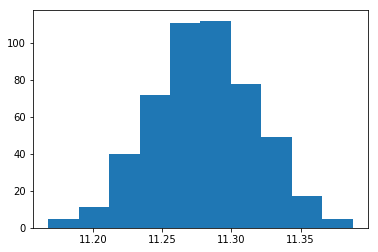

In [39]:
plt.hist(def_control)

In [15]:
from matplotlib import pyplot as plt 

In [42]:
from scipy import stats

In [45]:
len(def_control)

500

0.007292792160488773

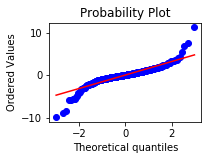

In [49]:
ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=500)
res = stats.probplot(x, plot=plt)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

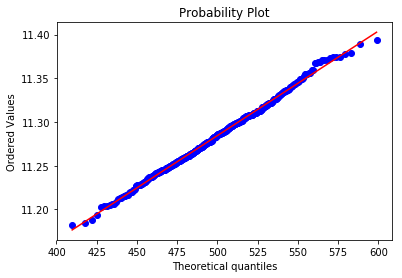

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

n=len(def_control)
stats.probplot(def_control_mean, dist="chi2", sparams=n-1, plot=ax)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

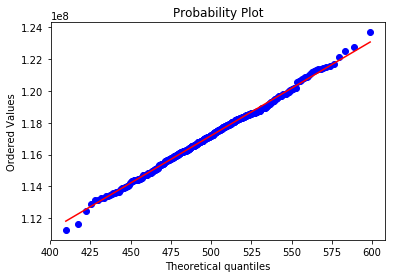

In [90]:

fig = plt.figure()
ax = fig.add_subplot(111)

n=len(def_control)
stats.probplot(def_control_stdev, dist="chi2", sparams=n-1, plot=ax)

In [95]:
df_exp=df[df['slot']=='exp']
df_control=df[df['slot']=='control']

In [98]:
df.columns

Index([u'userID', u'browser', u'slot', u'n_clicks', u'n_queries',
       u'n_nonclk_queries'],
      dtype='object')

In [100]:
dfg_exp=df_exp[[u'userID', u'n_clicks', u'n_queries',
       u'n_nonclk_queries']].groupby('userID').sum()

In [ ]:
dfg_exp=df_exp[[u'userID', u'n_clicks', u'n_queries',
       u'n_nonclk_queries']].groupby('userID').sum()
dfg_control=df_control[[u'userID', u'n_clicks', u'n_queries',
       u'n_nonclk_queries']].groupby('userID').sum()

In [104]:
d1=dfg_exp[[u'n_clicks']].values
d2=dfg_control[[u'n_clicks']].values

MannwhitneyuResult(statistic=41140868471.0, pvalue=8.694294377520879e-75)

In [107]:
import statsmodels.stats.multitest as smm

In [170]:
p_values = pd.DataFrame(index = [0], columns = df['browser'].value_counts().index)

In [180]:
for column in p_values.columns: 
    d1=df_exp[['browser', u'n_clicks']][df_exp['browser']==column]
    d2=df_control[['browser', u'n_clicks']][df_control['browser']==column]
    p_values[column][0] = stats.mannwhitneyu(d1[ u'n_clicks'], d2[ u'n_clicks'], alternative='two-sided').pvalue

In [182]:
reject, pvals_corrected, alphacSidak, alphacBonf =  smm.multipletests(p_values.iloc[0], alpha=0.05, method='h')

In [184]:
p_values

,Browser #4,Browser #22,Browser #2,Browser #14,Browser #20,Browser #17
0,0.815212,0.514811,0.0544877,0,0.907333,0.0748012


In [183]:
reject

array([False, False, False,  True, False, False])

In [189]:
dfg_exp=df_exp[[u'browser', u'n_clicks', u'n_queries',
       u'n_nonclk_queries']].groupby('browser').sum()
dfg_control=df_control[[u'browser', u'n_clicks', u'n_queries',
       u'n_nonclk_queries']].groupby('browser').sum()

In [190]:
dfg_exp['no_clicks_share']=dfg_exp['n_nonclk_queries']*1.0/dfg_exp['n_queries']*100
dfg_control['no_clicks_share']=dfg_control['n_nonclk_queries']*1.0/dfg_control['n_queries']*100

In [191]:
dfg_exp

,n_clicks,n_queries,n_nonclk_queries,no_clicks_share
browser,,,,
Browser #14,294556,282606,123656,43.755617
Browser #17,266285,210123,77614,36.937413
Browser #2,560109,548019,246514,44.982747
Browser #20,223212,187283,72998,38.977376
Browser #22,858666,743156,296177,39.853947
Browser #4,1058995,1011250,456508,45.142942


In [192]:
dfg_control

,n_clicks,n_queries,n_nonclk_queries,no_clicks_share
browser,,,,
Browser #14,207229,279998,161252,57.590411
Browser #17,266732,208921,75837,36.299367
Browser #2,565964,566239,260259,45.962747
Browser #20,225897,193752,78548,40.540485
Browser #22,879810,777135,315470,40.593977
Browser #4,1064395,1060771,498254,46.970930
